 ## Introduction
 Besides the amount of police call received from the neigborhood, knowing the details 311 Data, which is how many requests(reporting call) were made by people in neighborhood, could also help determine the quality of life in the place. For example, we don't want that much illegal parking, refuse pickup, and etc. in our village. So, if a neighborhood has made lots of requests about these, then you definitely don't want to live in that place. Therefore, that's why I want to examine the 311 Data with Python's pandas utility. Although the data is only from 2015 to 2022, it is still a reliable data since it has a long time range of data collection, and the end tear is not long away from 2025. 

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Explanation & Analyze part1
First of all, we have to import the data(311 DATA) to have access of the data. Second, we want to know how many sample size, which is the number of neighborhood, in the data. So I basically count all unique neighborhoods from the data and get that there are 91 neighborhoods in the data. By the way, since all the neighborhoods are from Pittsburgh as provided by the data information and description from the website in which I found the data, we don't have to worry that there would be neighborhoods not in Pitt being mixed up in the sample size. 

In [7]:
df = pd.read_csv('311-data.csv')

In [8]:
num_neighborhoods = df['neighborhood'].nunique()
print(num_neighborhoods , " negiborhoods in total.")

91  negiborhoods in total.


## Explanation & Analyze part2
Here, we count how many requests per neighborhood by focuing on counting how many times each unique neighborhood appears in the data. Then, we sort the neighborhoods by requests count in increasing order. Neighborhoods with less amount of request count means that they are more developed and have less problems than others. From the code result, Mount Oliver Borough & Arlington Heights have unusually low requests counts compared to the other neighborhoods. However, both neighborhoods request counts are too deviated from others. Therefore, we would not consider them as the two best neighborhoods. Instead, we would consider Glen Hazel to be the best neighborhood with the least amount of request count. Brookline has the most request count compated to others, meaning that it is still in the process of developing. Below is the dataset

In [10]:
neighborhood_counts = df['neighborhood'].value_counts()
best_neighborhoods = neighborhood_counts.sort_values()
print(best_neighborhoods)

neighborhood
Mount Oliver Borough       98
Arlington Heights         167
Glen Hazel                477
Northview Heights         836
Ridgemont                 909
                        ...  
Squirrel Hill South     29226
South Side Slopes       29508
South Side Flats        29758
Carrick                 31017
Brookline               32245
Name: count, Length: 91, dtype: int64


# IMPORTANT***
Since the size of data is too big, we seperate the graph for the data into 3 DIFFERENT GRAPHS. FIRST GRAPH is the top 10 neighborhoods with the least request counts. For SECOND GRAPH, we have the graph that shows the neighborhoods with average request counts. For THRID GRAPH, we have the top 10 neighborhoods with the most request counts. We choose bar graph to easily visualize the amount of request counts for each neighborhood. The x-axis lists out names of neighborhoods; the y-axis is the number of request counts.

## Explanation & Analyze part3(for 1st Graph)
The reason that we skipped the first two neighborhoods is that both of them have unusually low request counts compared to other neighborhoods followed by, meaning that there might be some misreport from the original 311 Data. From the graph above, we can see that Glen Hazel has the least amount of requests among the top 10 least requests neighborhoods(with less than 500 requests). This means that it is the most developed neighborhood among all neighborhoods in the city of pittsburgh.

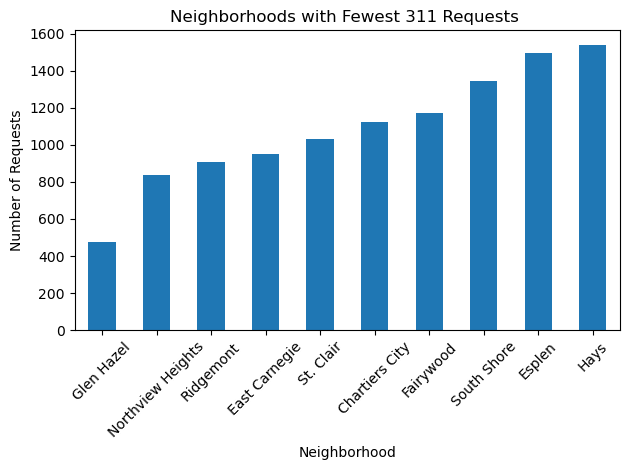

In [ ]:

neighborhoods_skip_two = best_neighborhoods.iloc[2:]
top_10_after_skip = neighborhoods_skip_two.head(10)
top_10_after_skip.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Requests')
plt.title('Neighborhoods with Fewest 311 Requests ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Explanation & Analyze part4 (for 2nd Graph)
The graph below just lists out all neighborhoods with overall average number of requests; we want to know the average to know the overall Pittsburgh city's neighborhoods conditions. From the graph, we see that the average request counts is 8000 requests.

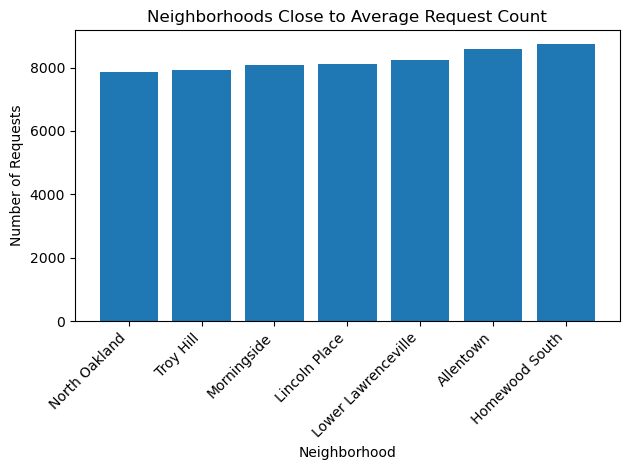

In [ ]:
mean_requests = best_neighborhoods.mean()
tolerance = 0.1  # 10 percent tolerance
lower_bound = mean_requests * (1 - tolerance)
upper_bound = mean_requests * (1 + tolerance)
close_to_average = best_neighborhoods[(best_neighborhoods >= lower_bound) & (best_neighborhoods <= upper_bound)]


positions = range(len(close_to_average))
labels = close_to_average.index.tolist()
plt.bar(positions, close_to_average.values)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Requests')
plt.title('Neighborhoods Close to Average Request Count')
plt.xticks(positions, labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()



## Explanation & Analyze part5(for 3rd Graph)
The graph below lists out the top 10 neighborhoods with the most amount of requests; we want to know which neighborhood needs to be focused on improving. From the graph, we see that Brookline has the most number of requests(above 30k requests). This means that it has many problems waiting to be solved and is still developing. 


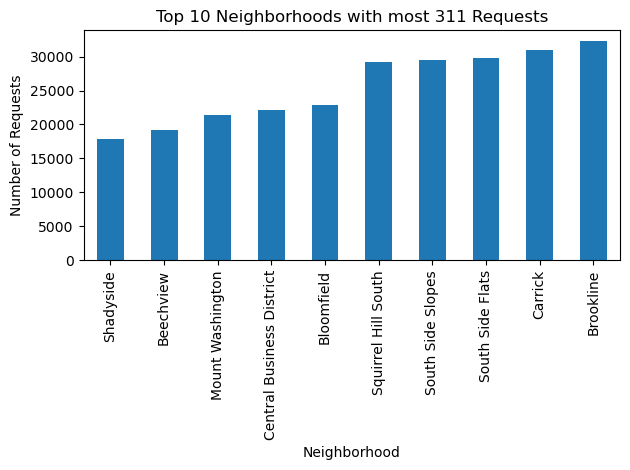

In [18]:
tail_10 = best_neighborhoods.tail(10)
tail_10.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Requests')
plt.title('Top 10 Neighborhoods with most 311 Requests')
plt.tight_layout()
plt.show()


## Conclusion:
From all graphs above, we can conclude that Glen Hazel(with less than 500 requests) might be the best neighborhood among others because it has the least number of requests. We can also conclude that Brookline(with above 30k requests) is the neighborhood that still needs improvements on developing because it has the most number of requests compared to others. Be happy, North Oakland, where our school locates, is in average on amount of requests(i.e in average 8k requests); it's not bad!! I am surprised that Troy Hill is also in average amount of requests. The reason is that Troy Hill is the safest neighborhood according to the Criminal dataset from my team, leading me to think that Troy Hill might be within the top 10 neighborhoods with least amount of requests. So my observation about correlation between criminal case and request number was not quite right.